In [393]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as cm
import copy

In [394]:
def get_vel(data):
    return data["vel"]

In [395]:
def plot_vel(vel_data):
    step = np.arange(len(vel_data))
    plt.figure(figsize=(12, 4))
    plt.plot(step,vel_data ,color='blue', linestyle='-', marker='o', markersize=0.2 , label="lin_vel")
    plt.xlabel("Step Number")
    plt.ylabel("Linear Velocity(m/s)")
    plt.title("Linear Velocity Over Steps")
    # Add a legend to differentiate state and action lines
    plt.legend()


In [396]:
def plot_arr_vel(vel_arr):
    step = np.arange(len(vel_arr[0]))
    plt.figure(figsize=(12, 4))
    cmap = plt.get_cmap("tab10", len(vel_arr))
    for i,vel in enumerate(vel_arr):
        plt.plot(step,vel ,color=cmap(i), linestyle='-', marker='o', markersize=0.2 , label=f"lin_vel-{i}")
        plt.xlabel("Step Number")
        plt.ylabel("Linear Velocity(m/s)")
        plt.title("Linear Velocity Over Steps")
        # Add a legend to differentiate state and action lines
        plt.legend()


## **Data Exploration**

In [397]:
lin_vel_data = {"average" : {} , "all" : {}}

### **`Full State` Data**

In [398]:
num_seeds = 5
data_fullstate0 = np.empty(num_seeds, dtype=object)
for i in range(num_seeds):
    data_fullstate0[i] = np.load(f"data/HEBB-FULL-STATE_seed-{i}-fullstate.npz")

#### **Get Velocity**

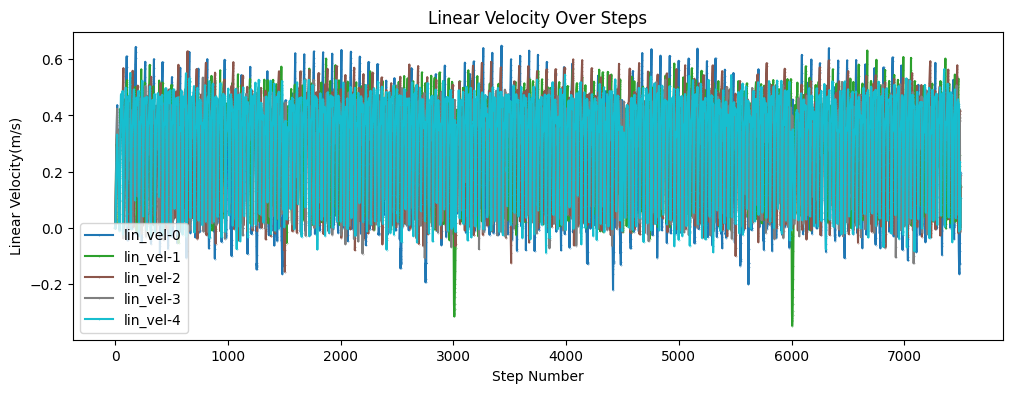

In [399]:
fullstate_vel_arr = np.array([get_vel(data) for data in data_fullstate0])# plot_vel(get_vel(data_no_jpos0))

plot_arr_vel(vel_arr=fullstate_vel_arr)

#### **Average Velocity**

In [400]:
fullstate_vel_avg = fullstate_vel_arr.mean(axis=1)
lin_vel_data["all"]["fullstate"] = fullstate_vel_arr
lin_vel_data["average"]["fullstate"] = fullstate_vel_avg 
print("Full state average vel : " , fullstate_vel_avg)
print("Full state average vel : " , fullstate_vel_avg.mean())

Full state average vel :  [0.27395248 0.30568957 0.32142702 0.3222626  0.3383091 ]
Full state average vel :  0.31232816


### **No Joint `Position` Data**

In [401]:
data_no_jpos0 = np.empty(num_seeds, dtype=object)
for i in range(num_seeds):
    data_no_jpos0[i] = np.load(f"data/HEBB-FULL-STATE_seed-{i}-noJPOS.npz")

#### **Get Velocity**

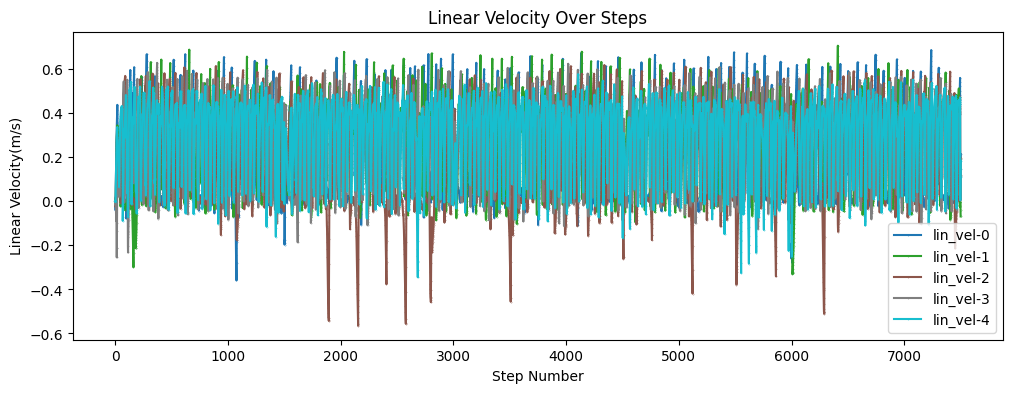

In [402]:
no_jpos_vel_arr = np.array([get_vel(data) for data in data_no_jpos0])# plot_vel(get_vel(data_no_jpos0))# plot_vel(get_vel(data_no_jpos0))
plot_arr_vel(vel_arr=no_jpos_vel_arr)

#### **Average Velocity**

In [403]:
no_jpos_vel_avg = no_jpos_vel_arr.mean(axis=1)
lin_vel_data["all"]["no_joint_pos"] = no_jpos_vel_arr
lin_vel_data["average"]["no_joint_pos"] = no_jpos_vel_avg 
print("No joint position average vel : " , no_jpos_vel_avg)
print("No joint position average vel : " , no_jpos_vel_avg.mean())

No joint position average vel :  [0.19168578 0.2713695  0.19845393 0.290986   0.30272597]
No joint position average vel :  0.2510442


### **No Joint `Velocity` Data**

In [404]:
num_seed = 5
data_no_jvel0 = np.empty(num_seeds, dtype=object)
for i in range(num_seeds):
    data_no_jvel0[i] = np.load(f"data/HEBB-FULL-STATE_seed-{i}-noJVEL.npz")

#### **Get Velocity**

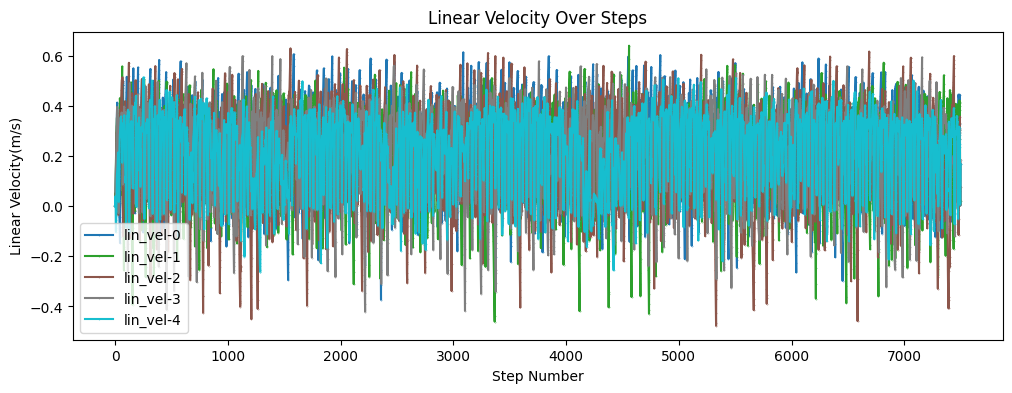

In [405]:
no_jvel_vel_arr = np.array([get_vel(data) for data in data_no_jvel0])# plot_vel(get_vel(data_no_jpos0))# plot_vel(get_vel(data_no_jpos0))

# plot_vel(get_vel(data_no_jpos0))
plot_arr_vel(vel_arr=no_jvel_vel_arr)

#### **Average Velocity**

In [406]:
no_jvel_vel_avg = no_jvel_vel_arr.mean(axis=1)
lin_vel_data["all"]["no_joint_vel"] = no_jvel_vel_arr
lin_vel_data["average"]["no_joint_vel"] = no_jvel_vel_avg 
print("No joint position average vel : " , no_jvel_vel_avg)
print("No joint position average vel : " , no_jvel_vel_avg.mean())

No joint position average vel :  [0.25177667 0.22112384 0.21447144 0.21957208 0.22564365]
No joint position average vel :  0.22651753


### **No Feedback `Action` Data**

In [407]:
data_no_action = np.empty(num_seeds, dtype=object)
for i in range(num_seeds):
    data_no_action[i] = np.load(f"data/HEBB-FULL-STATE_seed-{i}-noACTION.npz")

#### **Get Velocity**

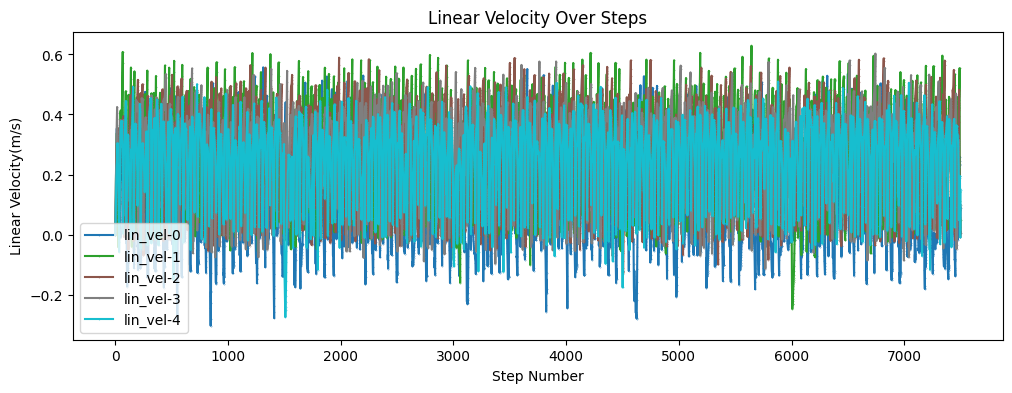

In [408]:
no_action_vel_arr = np.array([get_vel(data) for data in data_no_action])# plot_vel(get_vel(data_no_jpos0))
plot_arr_vel(vel_arr=no_action_vel_arr)

#### **Average Velocity**

In [409]:
no_action_vel_avg = no_action_vel_arr.mean(axis=1)
lin_vel_data["all"]["no_action"] = no_action_vel_arr
lin_vel_data["average"]["no_action"] = no_action_vel_avg 
print("No joint position average vel : " , no_action_vel_avg)
print("No joint position average vel : " , no_action_vel_avg.mean())

No joint position average vel :  [0.12940937 0.27822754 0.26497588 0.28014043 0.26023552]
No joint position average vel :  0.24259774


### **No `IMU` Data**

In [410]:
data_no_imu = np.empty(num_seeds, dtype=object)
for i in range(num_seeds):
    data_no_imu[i] = np.load(f"data/HEBB-FULL-STATE_seed-{i}-noIMU.npz")

#### **Get Velocity**

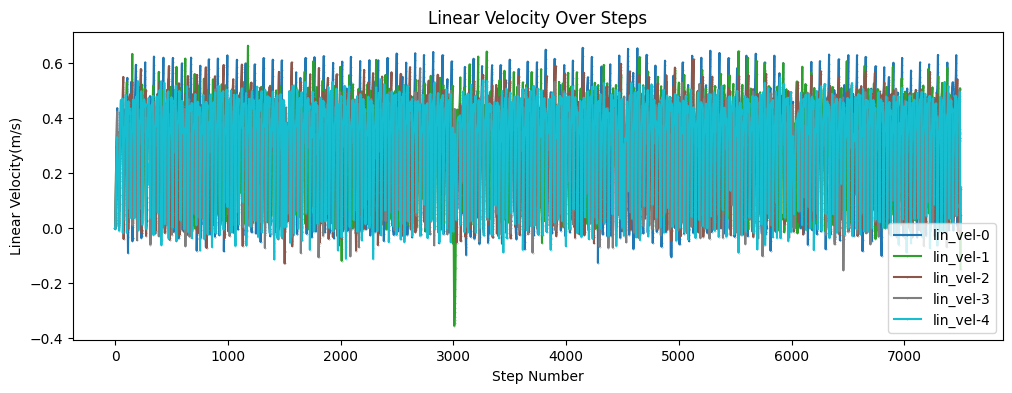

In [411]:
no_imu_vel_arr = np.array([get_vel(data) for data in data_no_imu])# plot_vel(get_vel(data_no_jpos0))

# plot_vel(get_vel(data_no_jpos0))
plot_arr_vel(vel_arr=no_imu_vel_arr)

#### **Average Velocity**

In [412]:
no_imu_vel_avg = no_imu_vel_arr.mean(axis=1)
lin_vel_data["all"]["no_imu"] = no_imu_vel_arr
lin_vel_data["average"]["no_imu"] = no_imu_vel_avg 
print("No joint position average vel : " , no_imu_vel_avg)
print("No joint position average vel : " , no_imu_vel_avg.mean())

No joint position average vel :  [0.29588953 0.30579612 0.31894988 0.3206025  0.33444616]
No joint position average vel :  0.31513685


### **No `Feet Contact` Data**

In [413]:
num_seed = 5
data_no_fc = np.empty(num_seeds, dtype=object)
for i in range(num_seeds):
    data_no_fc[i] = np.load(f"data/HEBB-FULL-STATE_seed-{i}-noFC.npz")

#### **Get Velocity**

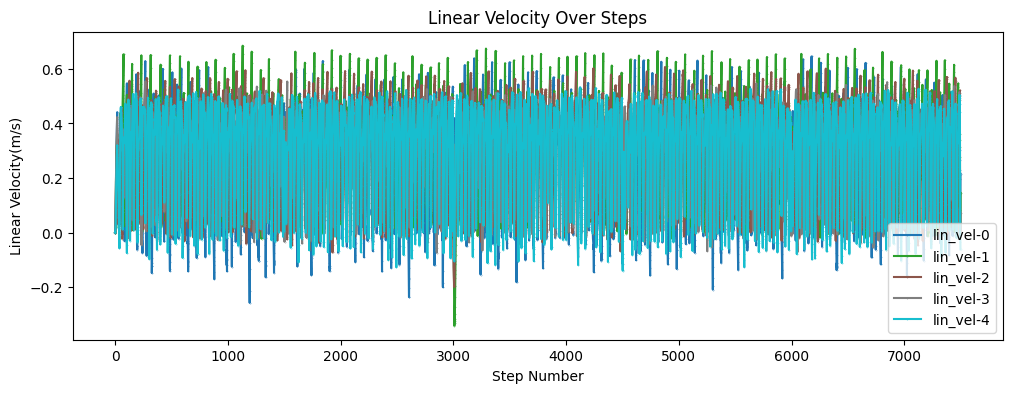

In [414]:
no_fc_vel_arr = np.array([get_vel(data) for data in data_no_fc])# plot_vel(get_vel(data_no_jpos0))
# plot_vel(get_vel(data_no_jpos0))
plot_arr_vel(vel_arr=no_fc_vel_arr)

#### **Average Velocity**

In [415]:
no_fc_vel_avg = no_fc_vel_arr.mean(axis=1)
lin_vel_data["all"]["no_fc"] = no_fc_vel_arr
lin_vel_data["average"]["no_fc"] = no_fc_vel_avg 
print("No joint position average vel : " , no_fc_vel_avg)
print("No joint position average vel : " , no_fc_vel_avg.mean())

No joint position average vel :  [0.25714353 0.30402032 0.3234304  0.31466028 0.31494924]
No joint position average vel :  0.30284077


## **Summary Performance**

### **batching the data**

Clone from root dataset

In [481]:
vel_batch = copy.deepcopy(lin_vel_data)

In [485]:
size = 7500 # max 7500
for key in vel_batch["all"]:
    vel_batch["all"][key] = vel_batch["all"][key][:, :size]
    # print(vel_batch["all"][keys].shape)

In [535]:
def boxplot_performance(dict_of_all_data, seed=0):
    labels = list(dict_of_all_data.keys())
    data = [dict_of_all_data[key][seed] for key in labels]

    plt.figure(figsize=(8, 5))
    plt.boxplot(data, tick_labels=labels, patch_artist=False)
    plt.title(f"Box Plot of Performance at Seed {seed}")
    plt.xlabel("Metrics")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [536]:
def boxplot_all_performance(dict_of_all_data):
    all_data = []
    all_labels = []
    all_colors = []

    category_colors = ["skyblue", "lightgreen", "lightcoral", "plum", "khaki"]  # Add more if needed
    category_means = []

    plt.figure(figsize=(14, 6))
    
    color_idx = 0
    xtick_positions = []
    category_start = 0

    for category_idx, (category, seed_data_list) in enumerate(dict_of_all_data.items()):
        color = category_colors[category_idx % len(category_colors)]
        group_means = []

        for seed_idx, seed_data in enumerate(seed_data_list):
            all_data.append(seed_data)
            all_labels.append(f"{category}_seed{seed_idx}")
            all_colors.append(color)

            group_means.append(np.mean(seed_data))

        # Store mean of the group and its midpoint index
        mean_y = np.mean(group_means)
        category_center = category_start + len(seed_data_list) / 2.0
        category_means.append((category_center, mean_y))
        category_start += len(seed_data_list)

    # Create boxplot
    bp = plt.boxplot(all_data, patch_artist=True, tick_labels=all_labels)

    # Apply colors
    for patch, color in zip(bp["boxes"], all_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.8)

    # Plot mean line per category
    for x, mean_y in category_means:
        plt.hlines(mean_y, x - 0.4, x + 0.4, colors='black', linestyles='--', linewidth=2, label='group mean')

    plt.title("Box Plot of Performance Across Seeds")
    plt.xlabel("Metric + Seed")
    plt.ylabel("Values")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
boxplot_performance(vel_batch["all"] , seed=0)
boxplot_performance(vel_batch["all"] , seed=1)
boxplot_performance(vel_batch["all"] , seed=2)
boxplot_performance(vel_batch["all"] , seed=3)
boxplot_performance(vel_batch["all"] , seed=4)

### **Comparing between each seed**

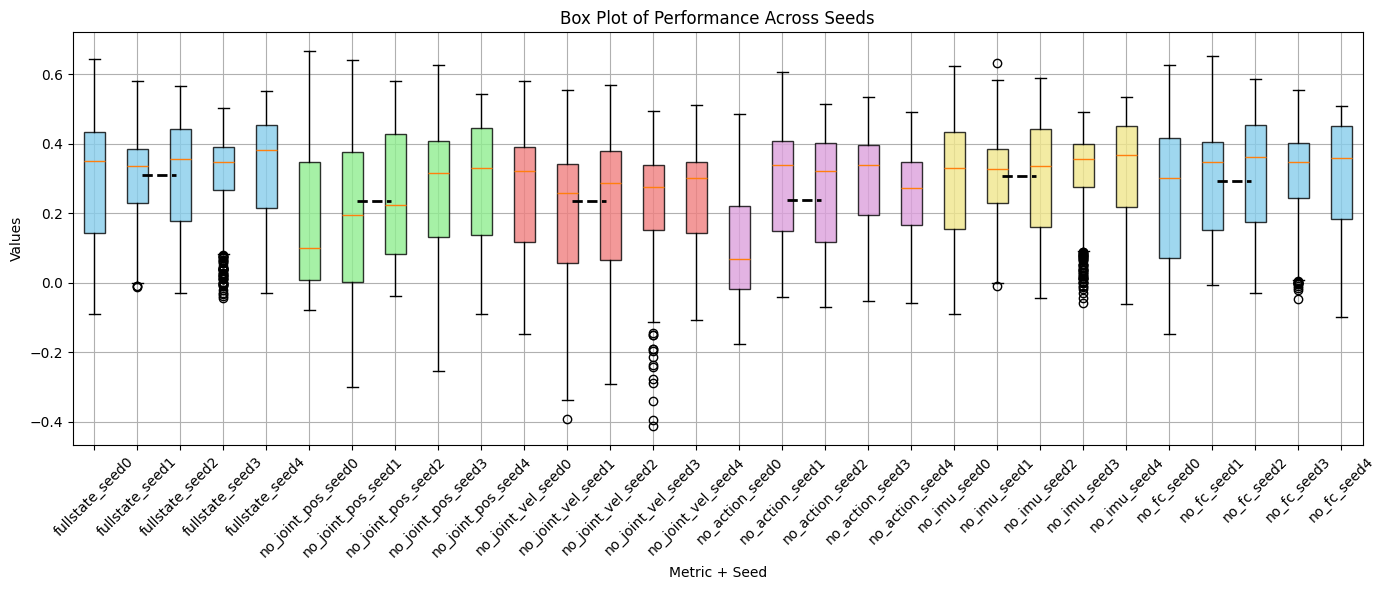

In [538]:
boxplot_all_performance(vel_batch["all"])

In [530]:
def scatter_all_average_performance(dict_of_all_data):
    categories = list(dict_of_all_data.keys())
    category_colors = ["skyblue", "lightgreen", "lightcoral", "plum", "khaki", "lightgray"]
    num_categories = len(categories)

    # Stack all data: shape (num_categories, num_seeds)
    data_matrix = np.array([dict_of_all_data[cat] for cat in categories])  # shape: (C, S)
    num_seeds = data_matrix.shape[1]

    plt.figure(figsize=(12, 6))

    # Plot each seed as a connected line
    for seed_idx in range(num_seeds):
        y = data_matrix[:, seed_idx]
        x = np.arange(1, num_categories + 1)
        plt.plot(x, y, marker='o', label=f"seed {seed_idx}", linewidth=1.5, alpha=0.7)
        plt.scatter(x, y, color='black', s=30, zorder=3)

    # X-axis category labels
    plt.xticks(ticks=np.arange(1, num_categories + 1), labels=categories, rotation=30)
    
    plt.title("Performance Comparison by Seed Across Categories")
    plt.xlabel("Input Modality")
    plt.ylabel("Linear velocity")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.legend(title="Seeds", loc="best", fontsize=8)
    plt.tight_layout()
    plt.show()

In [531]:
def boxplot_all_average_performance(dict_of_all_data):
    import matplotlib.pyplot as plt
    import numpy as np

    all_data = []
    all_labels = []
    all_colors = []

    category_colors = ["skyblue", "lightgreen", "lightcoral", "plum", "khaki", "lightgray"]
    
    plt.figure(figsize=(12, 6))

    for idx, (category, values) in enumerate(dict_of_all_data.items()):  # key , value
        values = np.array(values)
        if values.ndim > 1:
            values = values.flatten()
        all_data.append(values)
        all_labels.append(category)
        all_colors.append(category_colors[idx % len(category_colors)])

    # Create boxplot
    bp = plt.boxplot(all_data, patch_artist=True, tick_labels=all_labels)

    # Color boxes
    for patch, color in zip(bp['boxes'], all_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.8)

    # Add vertical scatter points (no jitter)
    for i, values in enumerate(all_data):
        x = np.full_like(values, i + 1, dtype=float)
        plt.scatter(x, values, alpha=0.9, s=30, color='black', zorder=3)

    plt.title("Box Plot of Performance Across Categories")
    plt.xlabel("Input Modality")
    plt.ylabel("Linear velocity")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


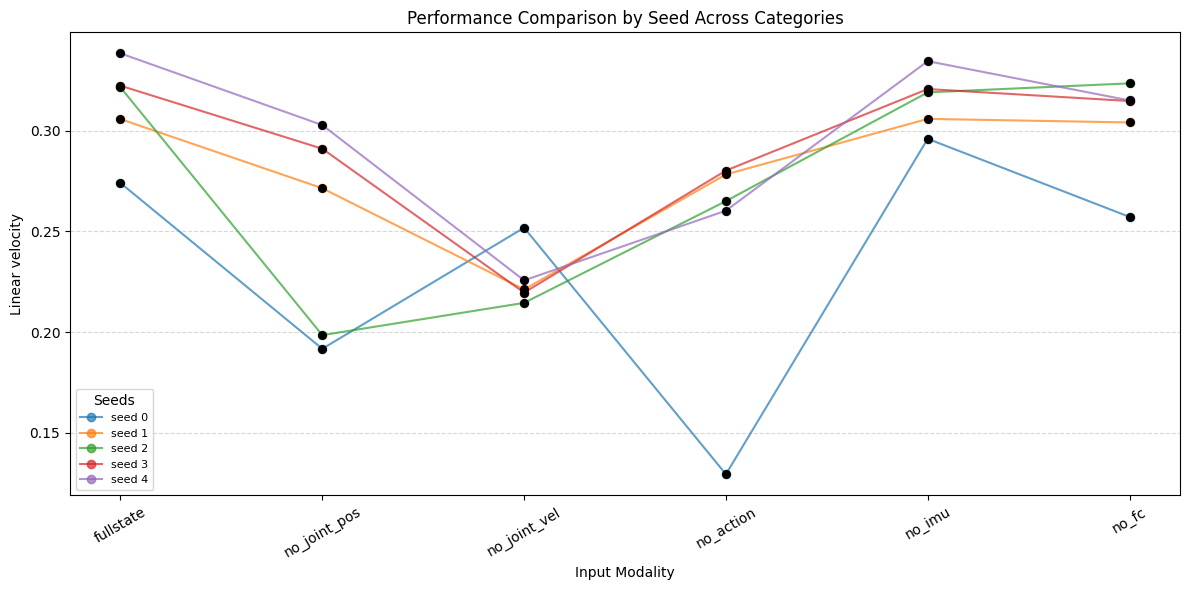

In [532]:
scatter_all_average_performance(vel_batch["average"])

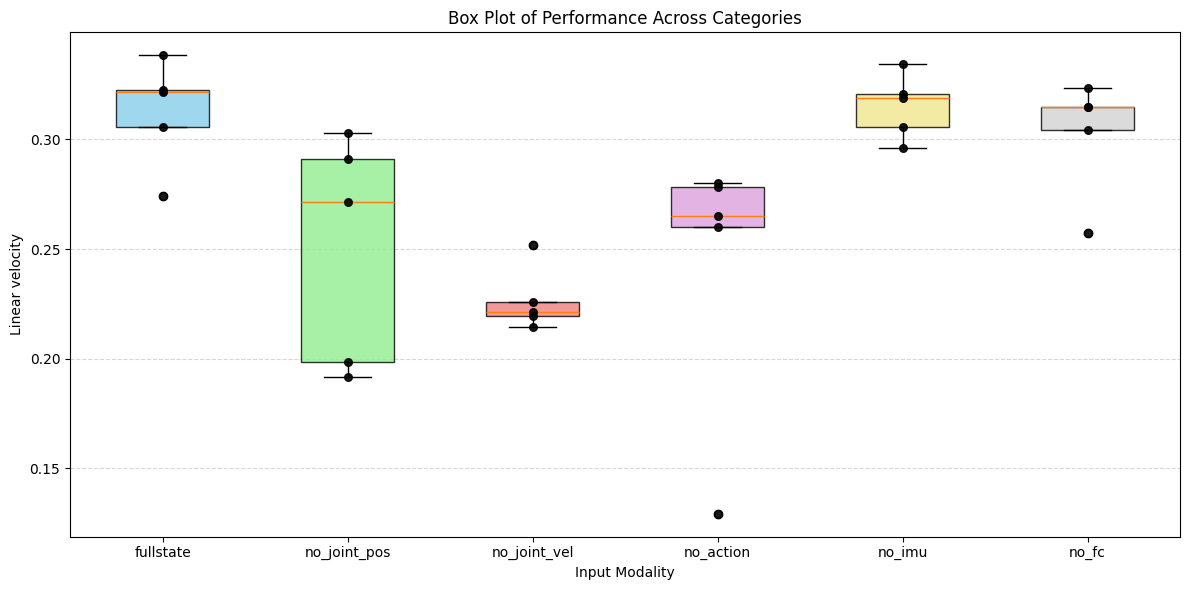

In [533]:
boxplot_all_average_performance(vel_batch["average"])